# **Final Project**

### YouTube API, Speech recognition with Deep Speech, and word2vec

_made by Polina Artemeva_



This project was inspired by all the classes we've had. I have learned how to take data from different sites and some possibilities to analyze it. I have also discovered that NLP is a very interesting field of work and actually it is not as far from us as it could seem. So, here I am trying to use some of its methods.
Further you will see:


1.   How I am trying to get US YouTube trending videos. 
2.   Using DeepSpeech NeuroNetwork to recognise speech and turn it into text.*
3.   Turn received texts into word2vec model**.
4.   Give this model a couple of queries.
5.   Visualise data.

*Of course I was not able to train this Network myself, because it is a resource-intensive task - it is taken from the Internet. At the same time, the method still requires a powerful GPU, which my computer does not possess. That is the reason why this project can be run on Google Colab.

**I am using the corpus of YouTube speech from the evening of 23.11.2020. I also recommend not to run the code, because it will take a lot of time (really a lot).

What is the probable usefulness of this project? In theory it can help to realise what is trending each day or even moment on YouTube or ti analyze speech of a single youtuber.

So, let's start.

## **1. YouTube API**

First step is to send request to YouTube to get videos from trends. I am using API here. You can look at the  URL and see that it consists of different parameters such as _chart_, _region_, _API key_ and _max result_. By these parameters we get 40 trending videos from the US YouTube. _API key_ is also essential because, actually, you cannot get information about videos as many times as you want. Each API YouTube user has limited amount of access. It is also suggested not to give away your API key.

```
api_key = 'your API goes here'
```
This lines gives a possibility to change an API key depending on a user.

```
response = urllib.request.urlopen(url)
```
Opening the file that we get from the YouTube. The format of it is .json this is why
 
```
json.loads(response.read().decode())
```
I am using it here to read the file.

Finally, we are getting a dictionary where all the information about videos is contained.






In [ ]:
import urllib.request, json 
api_key = 'your API here'
url = "https://www.googleapis.com/youtube/v3/videos?part=contentDetails&chart=mostPopular&regionCode=US&key={}&maxResults=40".format(api_key)
response = urllib.request.urlopen(url)
data = json.loads(response.read().decode())
print(data)

{'kind': 'youtube#videoListResponse', 'etag': 'Canof62P_1vBriP-Zg7JiMa_asE', 'items': [{'kind': 'youtube#video', 'etag': 'wIJmXiF8WbyDj7snKks68yL-9dM', 'id': 'PvRO4atynvc', 'contentDetails': {'duration': 'PT12M54S', 'dimension': '2d', 'definition': 'hd', 'caption': 'false', 'licensedContent': True, 'contentRating': {}, 'projection': 'rectangular'}}, {'kind': 'youtube#video', 'etag': 'tr2Gl_ESpoAR75OhW4DbY-c7eUw', 'id': '1d7FDA2M-9E', 'contentDetails': {'duration': 'PT19M28S', 'dimension': '2d', 'definition': 'hd', 'caption': 'false', 'licensedContent': True, 'contentRating': {}, 'projection': 'rectangular'}}, {'kind': 'youtube#video', 'etag': 'dWdx9DD79OwyP3p6wTItMv3tAdM', 'id': '-c6TMmsLCxg', 'contentDetails': {'duration': 'PT5M4S', 'dimension': '2d', 'definition': 'hd', 'caption': 'false', 'licensedContent': False, 'contentRating': {}, 'projection': 'rectangular'}}, {'kind': 'youtube#video', 'etag': 'vdCXLa8UMVmNyQMyPGDWniIPAKI', 'id': 'ncvA8_H-wkQ', 'contentDetails': {'duration': 'P

To find videos and extract audio files from them we need to know their ID. From the previous dictionary data I am creating a list of video IDs. 

In [ ]:
video_ids = []

for video in data['items']: 
  video_ids.append(video['id'])
  
video_ids

['PvRO4atynvc',
 '1d7FDA2M-9E',
 '-c6TMmsLCxg',
 'ncvA8_H-wkQ',
 'rIvwpeRtK58',
 'FSe1HFBMmHU',
 'kRaWjM4BYfI',
 'rhQBvsFAvCo',
 'g5idjxf4jHI',
 'yWBTHHwSEHo',
 '3e6wSH496ok',
 'Sl4VInQMuiY',
 'Zn0oMgXn3tk',
 'A5H8zBb3iao',
 'WAsFLsG0qPY',
 'Ygv9b2exV5c',
 'kdwE6e6NI40',
 '3YXUWWZJXpE',
 'K_YHOhm1hcY',
 'qc1oLeFY5i4',
 '8JrpOFWczLs',
 '--smQkLRmrY',
 'Ims1QBH-vRw',
 '9cOq9N4rCrI',
 'v4yqcI8HinA',
 '6FrQfONE5zk',
 'YQClzgVO2AE',
 '6bUU_58xrtc',
 'xl125ZovpAA',
 'ozZsSt-IzzA',
 'QYL2SSyv4P0',
 '3xccQ_kxVhc',
 'Kk_jE_rSho0',
 '4ZwtCQ02nlk',
 'o9FC3Q9lVM8',
 'cR9_5dYNw_U',
 'm-_GFcWr0lI',
 'TKVtfQq_mI0',
 '6SlKD2tfKTo',
 'OFRjZtYs3wY']

## **2. Installing Deep Speech**. 
In the Internet I have found the code and information on how to use it. At first, I am importing the library. 
Deep Speech is an open speech-to-text engine.

Here we are installing dependencies (this is the stuff that makes Deep Speech possible) and Deep Speech engine. And we just choosing the version that we will use: 0.6.1

In [ ]:
#@title
import os
from os.path import exists, join, basename, splitext

if not exists('deepspeech-0.6.1-models'):
  !apt-get install -qq sox
  !pip install -q deepspeech-gpu==0.6.1 youtube-dl
  !wget https://github.com/mozilla/DeepSpeech/releases/download/v0.6.1/deepspeech-0.6.1-models.tar.gz
  !tar xvfz deepspeech-0.6.1-models.tar.gz

Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../1-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libmagic-mgc.
Preparing to unpack .../2-libmagic-mgc_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libmagic1:amd64.
Preparing to unpack .../3-libmagic1_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic1:amd64 (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libsox3:amd64.
Preparing to unpack .../4-libsox3_14.4.2-3ubuntu0.18.04.1_amd64.deb ...
Unpacking libsox3:amd64 (14.4.2-3ubuntu0.18.04.1) ...
Selecting previously un

### Transcribing Youtube Video

We are going to make speech recognition on the list of YouTube videos. After downloading the video, we are cutting off the sound and saving it to a .wav file. 


In [ ]:
!rm -rf *.wav

for id in video_ids:
  print("Downloaded https://www.youtube.com/watch\?v\={}".format(id))
  os.system('''youtube-dl --extract-audio --audio-format wav --output "test_{}.%(ext)s" https://www.youtube.com/watch\?v\={}'''.format(id, id))
  


Downloaded https://www.youtube.com/watch\?v\=-c6TMmsLCxg
Downloaded https://www.youtube.com/watch\?v\=ncvA8_H-wkQ
Downloaded https://www.youtube.com/watch\?v\=rIvwpeRtK58
Downloaded https://www.youtube.com/watch\?v\=Sl4VInQMuiY
Downloaded https://www.youtube.com/watch\?v\=yWBTHHwSEHo
Downloaded https://www.youtube.com/watch\?v\=g5idjxf4jHI
Downloaded https://www.youtube.com/watch\?v\=Zn0oMgXn3tk
Downloaded https://www.youtube.com/watch\?v\=WAsFLsG0qPY
Downloaded https://www.youtube.com/watch\?v\=Ygv9b2exV5c
Downloaded https://www.youtube.com/watch\?v\=A5H8zBb3iao
Downloaded https://www.youtube.com/watch\?v\=qc1oLeFY5i4
Downloaded https://www.youtube.com/watch\?v\=K_YHOhm1hcY
Downloaded https://www.youtube.com/watch\?v\=Ims1QBH-vRw
Downloaded https://www.youtube.com/watch\?v\=9cOq9N4rCrI
Downloaded https://www.youtube.com/watch\?v\=--smQkLRmrY
Downloaded https://www.youtube.com/watch\?v\=v4yqcI8HinA
Downloaded https://www.youtube.com/watch\?v\=6FrQfONE5zk
Downloaded https://www.youtube.

and finally doing the speech recognition. We are catching text that the model gives us with help of subprocess library.
We are reading the text that we get and decoding it to an understandable format.

In [ ]:
import subprocess

corpus = []
for id in video_ids:

  command = ['deepspeech', '--model', 'deepspeech-0.6.1-models/output_graph.pbmm', '--lm', 'deepspeech-0.6.1-models/lm.binary', '--trie', 'deepspeech-0.6.1-models/trie', '--audio', 'test_{}.wav'.format(id) ]
  p = subprocess.Popen(command, stdout=subprocess.PIPE)
  text = p.stdout.read()
  retcode = p.wait()
  corpus.append(text.decode("utf-8"))

Here we are saving the texts we got to .txt file.

In [ ]:
with open('corpus.txt', 'w') as file:
    for listitem in corpus:
        file.write('%s\n' % listitem)

We got a list which contained the texts we got and for some reason there were also __/n__ symbols everywhere. So, with this line we are cleaning the file from it.



In [3]:
corpus = []
with open('corpus.txt') as f:
  line = f.readline()
  corpus.append(line)
  while line!='':
    line = f.readline()
    corpus.append(line)

corpus = [s for s in corpus if s != '\n']

## **4. Working with the text and word2vec model**

So, we get a corpus of texts.
This part is almost the same that was in our first homework with a difference in that I am doing it for English language, not for Russian. I am not sure, if there is any punctuation included in the corpus but getting rid of it just in case will not hurt anyone.




In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


The words we get from out NeuroNetwork are hilarious because not all of the videos in trends are actually in English, but the machine does its best.

In [5]:
text = ' '.join(corpus) 

text = re.sub(r'[^\w\s]+|[\d]+', r'', text).strip() # getting rid of puntiation, just in case
word_tokens = word_tokenize(text)

filtered_sentence = [] # creating a list of stop words
stop_words = set(stopwords.words('english'))

for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w.lower()) 
        
text2 = filtered_sentence

print(text2[:500])

['ending', 'man', 'hundred', 'miles', 'shahabuddin', 'know', 'met', 'one', 'ouiatanon', 'devotion', 'temanite', 'bustling', 'temptations', 'returning', 'stool', 'pigeon', 'italian', 'nineteenth', 'gingalee', 'give', 'bosomed', 'sea', 'man', 'outbeatingest', 'biogenetic', 'esteeming', 'original', 'theres', 'epidemic', 'going', 'right', 'demi', 'goes', 'name', 'mobile', 'gaming', 'look', 'understand', 'appeal', 'mobile', 'games', 'busy', 'people', 'got', 'places', 'meet', 'look', 'got', 'three', 'corn', 'shops', 'ronan', 'mean', 'mobiles', 'stupid', 'okay', 'though', 'even', 'real', 'dames', 'sure', 'mobile', 'games', 'free', 'disguise', 'free', 'bombard', 'ads', 'okay', 'guess', 'want', 'understand', 'theres', 'time', 'place', 'phone', 'agree', 'spending', 'much', 'time', 'social', 'media', 'apps', 'bad', 'health', 'waiting', 'bus', 'im', 'sitting', 'bus', 'im', 'talking', 'bus', 'driver', 'missed', 'stop', 'dont', 'see', 'harm', 'slicing', 'fruit', 'serving', 'virtual', 'subways', 'bou

Lemmatizing the text.

In [6]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer()

word_list = text2
print(word_list) 
text_lem = '\n'.join([lemmatizer.lemmatize(w) for w in word_list])

with open('corpus_lem.txt', 'w', encoding='utf8') as f:    
  f.write(text_lem)

with open('corpus_lem.txt', 'r', encoding='utf8') as f:
    text_lem = f.read()
print(text_lem[:500])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['ending', 'man', 'hundred', 'miles', 'shahabuddin', 'know', 'met', 'one', 'ouiatanon', 'devotion', 'temanite', 'bustling', 'temptations', 'returning', 'stool', 'pigeon', 'italian', 'nineteenth', 'gingalee', 'give', 'bosomed', 'sea', 'man', 'outbeatingest', 'biogenetic', 'esteeming', 'original', 'theres', 'epidemic', 'going', 'right', 'demi', 'goes', 'name', 'mobile', 'gaming', 'look', 'understand', 'appeal', 'mobile', 'games', 'busy', 'people', 'got', 'places', 'meet', 'look', 'got', 'three', 'corn', 'shops', 'ronan', 'mean', 'mobiles', 'stupid', 'okay', 'though', 'even', 'real', 'dames', 'sure', 'mobile', 'games', 'free', 'disguise', 'free', 'bombard', 'ads', 'okay', 'guess', 'want', 'understand', 'theres', 'time', 'place', 'phone', 'agree', 'spending', 'much', 'time', 'social', 'media', 'apps', 'bad', 'health', 'waiting', 'bus', 'im', 'sitting', 'bus', 'im', 'talking', 'bus', '

word2vec model itself. The corpus is not very big, that's why I've decided to set *min_count* parameter to 2. Unfortunately, __stopwords__ do not get rid of very common words such as _know_, _like_ and other. This prevents the model to 'guess the trends'.

In [43]:
import gensim
import logging
import nltk.data
import pandas as pd
from gensim.models import Word2Vec
import warnings
from time import time
import multiprocessing

warnings.filterwarnings('ignore')
cores = multiprocessing.cpu_count() # it is for the multiprocessing, it measures the amount of cores in the processor

f = 'corpus_lem.txt'
data = gensim.models.word2vec.LineSentence(f)

w2v_model = Word2Vec(min_count=2, window=4, size=1000, sample=6e-5)
w2v_model.build_vocab(data) # building the vocabulary
w2v_model.train(data, total_examples=w2v_model.corpus_count, epochs=30)
w2v_model.wv.vocab

{'ending': <gensim.models.keyedvectors.Vocab at 0x7fd6ee153f28>,
 'man': <gensim.models.keyedvectors.Vocab at 0x7fd6ee155048>,
 'hundred': <gensim.models.keyedvectors.Vocab at 0x7fd6ee155080>,
 'mile': <gensim.models.keyedvectors.Vocab at 0x7fd6ee1550b8>,
 'know': <gensim.models.keyedvectors.Vocab at 0x7fd6ee1550f0>,
 'met': <gensim.models.keyedvectors.Vocab at 0x7fd6ee155128>,
 'one': <gensim.models.keyedvectors.Vocab at 0x7fd6ee155160>,
 'devotion': <gensim.models.keyedvectors.Vocab at 0x7fd6ee155198>,
 'temptation': <gensim.models.keyedvectors.Vocab at 0x7fd6ee1551d0>,
 'stool': <gensim.models.keyedvectors.Vocab at 0x7fd6ee155208>,
 'italian': <gensim.models.keyedvectors.Vocab at 0x7fd6ee155240>,
 'give': <gensim.models.keyedvectors.Vocab at 0x7fd6ee155278>,
 'sea': <gensim.models.keyedvectors.Vocab at 0x7fd6ee1552b0>,
 'outbeatingest': <gensim.models.keyedvectors.Vocab at 0x7fd6ee1552e8>,
 'original': <gensim.models.keyedvectors.Vocab at 0x7fd6ee155320>,
 'there': <gensim.models.ke

In [44]:
print(len(w2v_model.wv.vocab))

2324


Trying to see if people in America are still talking about the election. Or maybe the _trends_ have changed.

In [45]:
w2v_model.wv.most_similar(positive=['america']) 

[('feeding', 0.10931260138750076),
 ('even', 0.10725937783718109),
 ('cleveland', 0.10250729322433472),
 ('ocean', 0.09982507675886154),
 ('police', 0.09918712079524994),
 ('main', 0.09544114768505096),
 ('produced', 0.09299124777317047),
 ('prediction', 0.08893144875764847),
 ('excited', 0.08590908348560333),
 ('pay', 0.08507169783115387)]

In [57]:
w2v_model.wv.most_similar(positive=['black']) 

[('cutting', 0.10825956612825394),
 ('serving', 0.10483559221029282),
 ('blind', 0.10424382984638214),
 ('position', 0.09921745955944061),
 ('saving', 0.09759678691625595),
 ('except', 0.09734821319580078),
 ('coast', 0.09360051155090332),
 ('pointer', 0.08797891438007355),
 ('contract', 0.0870153158903122),
 ('war', 0.08651027083396912)]

But what are the most frequent words now?

In [46]:
w2v_model.wv.index2entity[:100]

['like',
 'one',
 'know',
 'dont',
 'get',
 'go',
 'thing',
 'time',
 'right',
 'see',
 'think',
 'want',
 'people',
 'going',
 'got',
 'day',
 'year',
 'im',
 'thats',
 'really',
 'would',
 'good',
 'say',
 'look',
 'every',
 'video',
 'even',
 'much',
 'also',
 'love',
 'little',
 'life',
 'back',
 'make',
 'well',
 'come',
 'guy',
 'way',
 'mean',
 'let',
 'man',
 'take',
 'u',
 'oh',
 'earthquake',
 'two',
 'three',
 'lot',
 'give',
 'ever',
 'could',
 'said',
 'ill',
 'first',
 'long',
 'youre',
 'never',
 'line',
 'home',
 'kind',
 'still',
 'story',
 'actually',
 'five',
 'something',
 'okay',
 'anything',
 'everything',
 'family',
 'sure',
 'old',
 'thirty',
 'point',
 'hundred',
 'yet',
 'may',
 'tell',
 'bit',
 'made',
 'there',
 'big',
 'feel',
 'cant',
 'god',
 'thank',
 'next',
 'always',
 'bad',
 'yes',
 'need',
 'many',
 'new',
 'part',
 'rock',
 'holiday',
 'put',
 'night',
 'side',
 'movie',
 'tree']

You can see that we need to do some additional corpus preprocessing. Even though we got a lot of words, we cannot say anything about trends at all.

At the same time we can see what is the most frequent words that are used by Americans in their speech. If we apply this method to only one YouTube channel we can find out what is its personal corpus of words.

# **5. Visualisation**

In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
words = ['white', 'black', 'love', 'america', 'state', 'game', 'garbage', 'police']
X = w2v_model[words]

In [55]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

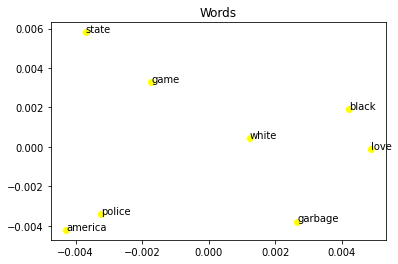

In [56]:
plt.scatter(coords[:, 0], coords[:, 1], color='yellow')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

The model is very small, so it doesn't show the real state of words' relations. These words are so far from each other just because it is very unlikely that the will be met in the same context in the corpus of 40 YouTube videos.

Also, it is very unlikely that in these 40 videos people will talk about something important. In my opinion, we should collect the data weekly and then it will be more useful.

In the next graph we will look at normal distribution and visualisation of the most frequent words.

In [58]:
!pip install wordcloud

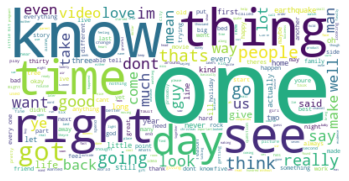

In [59]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join(text2)

cloud = WordCloud(background_color="white", max_words=2000)

# generating
cloud.generate(text)

# displaying
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# store to file
cloud.to_file("post_cloud.png")

Again, let's look at the distribution of lemmas.

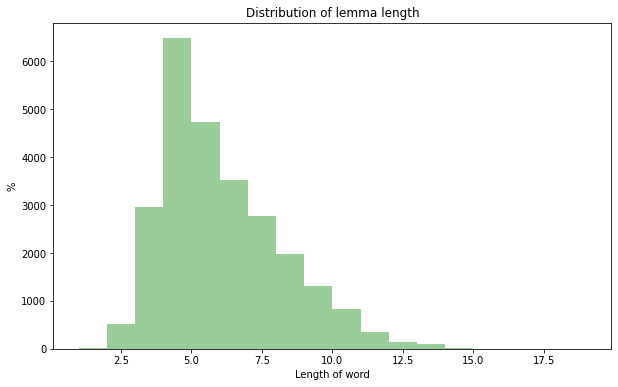

In [60]:
import seaborn as sns
df2 = df2 = pd.DataFrame(text2, columns=['lemmas'])


df2['length'] = df2['lemmas'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(df2['length'], bins=18, color='green',  kde = False)
plt.title('Distribution of lemma length')
plt.ylabel('%')
plt.xlabel('Length of word');

## **6. Conclusions**

Obviously, it is not enough to get rid of stopwords to find out trends. Many more common words such as _like_, _know_ or _bad_ are staying in the way. My guess that it is possible to create another library to remove these type of words and the goal will be closer.

But this project is very useful if we want to analyze one youtuber's speech. For example, which words does she or he uses most often and the semantic fields of them.

In general, it was very interesting to try to work with Speech Recognition model which transcribes the text, helps to analyze the data and gives us the results that we can visualize.